In [0]:
#Loading Libraries
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
import statsmodels as statm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotnine import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
filedata = pd.read_csv("train.csv")

In [0]:
#EDA
filedata.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [0]:
len(filedata.columns)

29

In [0]:
filedata.shape

(74111, 29)

In [0]:
filedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

In [0]:
#check for missing data
for col in filedata:
  if (filedata[col].isnull().any()):
    print(col)

bathrooms
first_review
host_has_profile_pic
host_identity_verified
host_response_rate
host_since
last_review
neighbourhood
review_scores_rating
thumbnail_url
zipcode
bedrooms
beds


In [0]:
#Filling the NA's with 0's
filedata = filedata.fillna(0)

In [0]:
filedata.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,1.126662e+07,4.782069,3.155146,1.231929,38.445958,-92.397525,20.900568,72.842520,1.264239,1.707844
std,6.081735e+06,0.717394,2.153589,0.584780,3.080167,21.705322,37.828641,39.920507,0.852773,1.255092
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,80.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,94.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,99.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [0]:
#check for all stats
filedata.describe(include = 'all')

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
count,7.411100e+04,74111.000000,74111,74111,74111,74111.000000,74111.000000,74111,74111,74111,74111,74111,74111.0,74111,74111,74111,74111,74111,74111.0,74111.000000,74111.000000,74111,74111.0,74111.000000,74111.000000,74111.0,74111,74111.000000,74111.000000
unique,NaN,NaN,35,3,67122,NaN,NaN,5,5,2,6,73479,2555.0,3,3,81,3088,2,1372.0,NaN,NaN,73359,620.0,NaN,NaN,65884.0,770,NaN,NaN
top,NaN,NaN,Apartment,Entire home/apt,{},NaN,NaN,Real Bed,strict,True,NYC,"Hello, I've been running guest house for Korea...",0.0,t,t,100%,2015-03-30,f,0.0,NaN,NaN,Bunk bed in the Treat Street Clubhouse,0.0,NaN,NaN,0.0,11211.0,NaN,NaN
freq,NaN,NaN,49003,41310,586,NaN,NaN,72028,32374,54403,32349,8,15864.0,73697,49748,43254,246,54660,15827.0,NaN,NaN,8,6872.0,NaN,NaN,8216.0,1368,NaN,NaN
mean,1.126662e+07,4.782069,NaN,NaN,NaN,3.155146,1.231929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.445958,-92.397525,NaN,NaN,20.900568,72.842520,NaN,NaN,1.264239,1.707844
std,6.081735e+06,0.717394,NaN,NaN,NaN,2.153589,0.584780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.080167,21.705322,NaN,NaN,37.828641,39.920507,NaN,NaN,0.852773,1.255092
min,3.440000e+02,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.338905,-122.511500,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,6.261964e+06,4.317488,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.127908,-118.342374,NaN,NaN,1.000000,80.000000,NaN,NaN,1.000000,1.000000
50%,1.225415e+07,4.709530,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.662138,-76.996965,NaN,NaN,6.000000,94.000000,NaN,NaN,1.000000,1.000000
75%,1.640226e+07,5.220356,NaN,NaN,NaN,4.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.746096,-73.954660,NaN,NaN,23.000000,99.000000,NaN,NaN,1.000000,2.000000


In [0]:
numerics = ["int16", "int32", "int64", "float16", "float32", "float64", "uint8"]
numericdataX = filedata.select_dtypes(include = numerics)

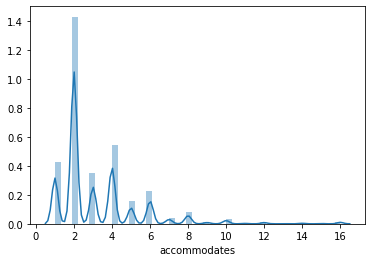

In [0]:
x =   numericdataX["accommodates"]
sns.distplot(x);

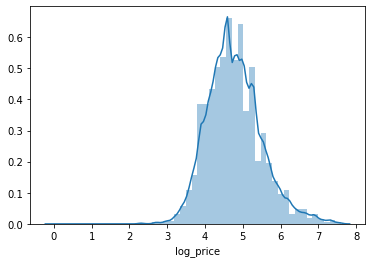

In [0]:
x= numericdataX.iloc[:,1]
sns.distplot(x);

/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


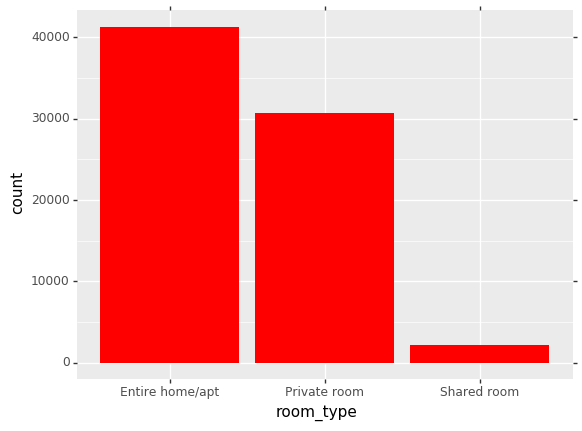

<ggplot: (-9223363274338057945)>

In [0]:
ggplot(filedata, aes(x='room_type')) + geom_bar(fill = "red")

/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


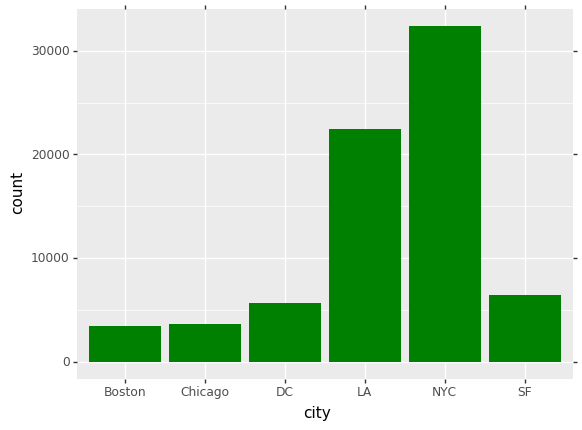

<ggplot: (8762516489136)>

In [0]:
ggplot(filedata, aes(x='city')) + geom_bar(fill = "green")

In [0]:
#check categorical data
filedata.describe(include=['O'])

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,thumbnail_url,zipcode
count,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111
unique,35,3,67122,5,5,6,73479,2555,3,3,81,3088,2,1372,73359,620,65884,770
top,Apartment,Entire home/apt,{},Real Bed,strict,NYC,"Hello, I've been running guest house for Korea...",0,t,t,100%,2015-03-30,f,0,Bunk bed in the Treat Street Clubhouse,0,0,11211.0
freq,49003,41310,586,72028,32374,32349,8,15864,73697,49748,43254,246,54660,15827,8,6872,8216,1368


In [0]:
#check numeric data
filedata.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,1.126662e+07,4.782069,3.155146,1.231929,38.445958,-92.397525,20.900568,72.842520,1.264239,1.707844
std,6.081735e+06,0.717394,2.153589,0.584780,3.080167,21.705322,37.828641,39.920507,0.852773,1.255092
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,80.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,94.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,99.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [0]:
filedata.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


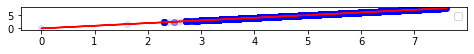

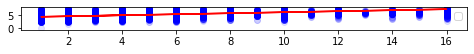

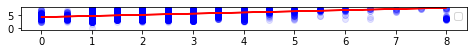

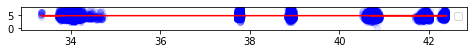

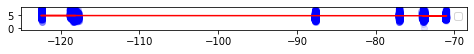

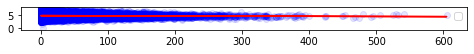

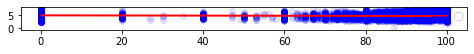

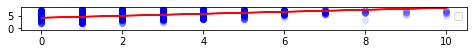

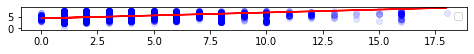

In [0]:
#Linear Assumptions
#Assumption that data points are linearly distributed
regressor = linear_model.LinearRegression()
for i in range(1,10): 
    x= np.array(numericdataX.iloc[:,i]).reshape(-1,1)
    y= np.array(filedata['log_price']).reshape(-1,1)
    regressor.fit(x,y)
    plt.figure(figsize=(8,5))
    plt.subplot(10,1,i)
    plt.scatter(x,y,color='blue', alpha=0.1)
    plt.plot(x,regressor.predict(x),color="red")
    plt.legend()

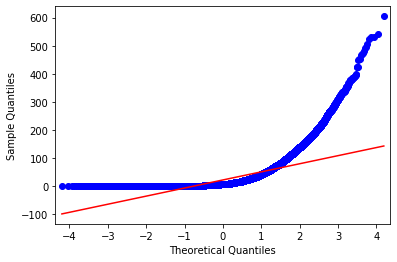

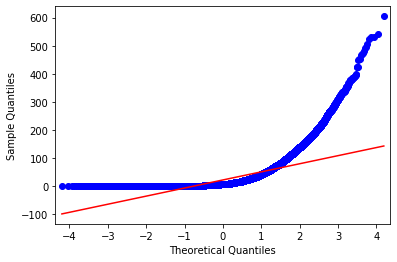

In [0]:
#Q-Q plot
statm.graphics.gofplots.qqplot(numericdataX.iloc[:,6], line='r')

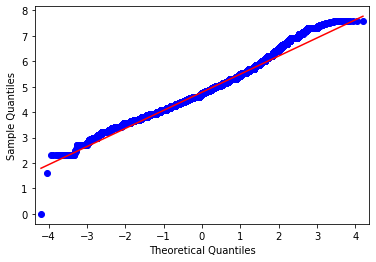

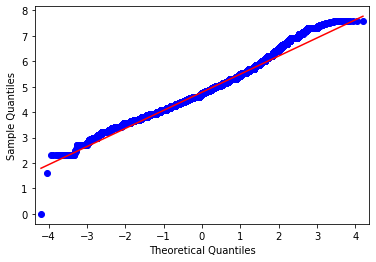

In [0]:
statm.graphics.gofplots.qqplot(numericdataX.iloc[:,1], line='r')

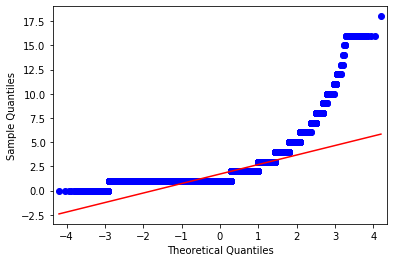

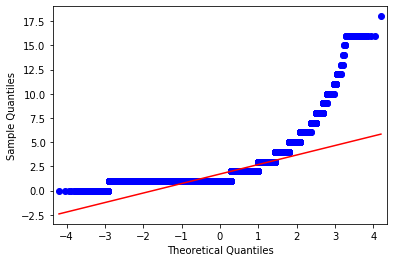

In [0]:
statm.graphics.gofplots.qqplot(numericdataX.iloc[:,9], line='r')

In [0]:
#Linear Regression
def checkCorrelation(data):
    """
    Plot correlation Matrix for given data
   :param data: dataset having features
   :return: return plot representing pearson correlation
   """
    plt.figure(figsize=(20, 20))
    sns.heatmap(data.corr(),linewidths=0.25,vmax=1.0,square=True,cmap="BuGn_r", 
    linecolor='w',annot=True)

In [0]:
def data_model(xdata):
    """
     fits linear regression model on given data
    :param xdata: independent variable dataset
    :return: linear regression model with fit of xdata 
   """
    #add constant to data
    X = sm.add_constant(xdata)
    targetY=filedata[['log_price']]
    y = targetY

    # Fit the linear model
    model = linear_model.LinearRegression()
    results = model.fit(X, y)
    model = sm.OLS(y, X)
    results = model.fit()
    return results

In [0]:
def data_summary(xdata):
    """
    Returns chart having summary of data
   :param xdata: independent variable dataset
   :return: summary of data 
   """
    results = data_model(xdata)
    return results.summary()

In [0]:
def crossValidationError(data):
    """
   Finds cross validation error of model
   :param X: independent variable dataset
   :return: float value returns mean squared error
   """
    numericdataX=data
    X = np.array(numericdataX.drop(['log_price'],axis=1), dtype=pd.Series)
    Y = np.array(numericdataX['log_price'], dtype=pd.Series)
    regr1 = linear_model.LinearRegression()
    ms_errors= cross_val_score(regr1, X, Y, cv=5, scoring = make_scorer(mean_squared_error))
    rms_errors = np.sqrt(ms_errors)
    mean_rms_error = rms_errors.mean()
    return mean_rms_error

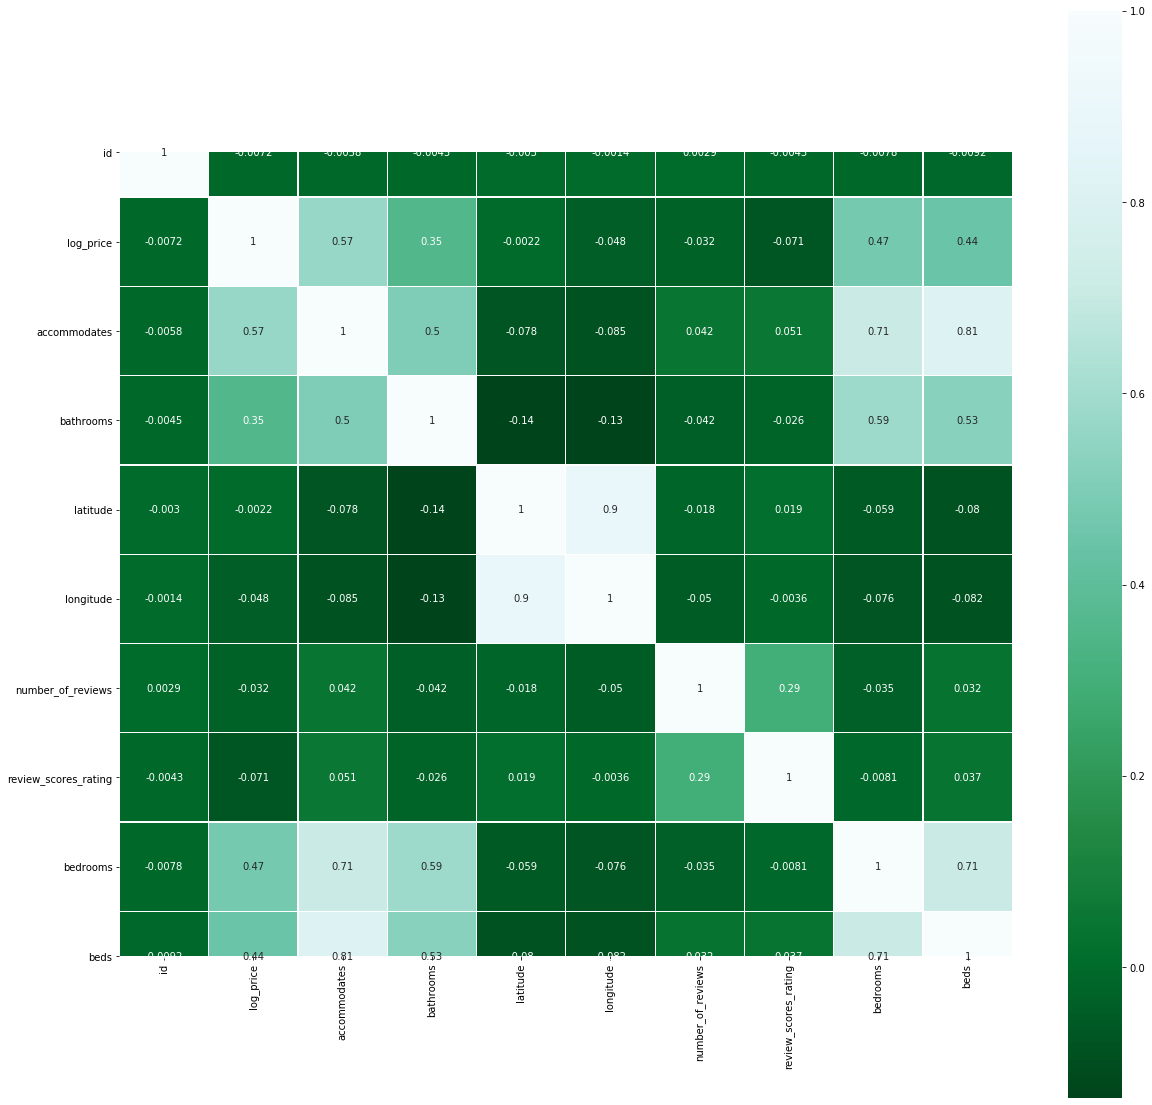

In [0]:
checkCorrelation(numericdataX)

In [0]:
#So as per correlation matrix colums such as latitude, longitude, number_of_reviews and review_scores_rating are not making much impact on log_price
#as value of correlation is poor drop them from dataset
numericdataX = numericdataX.drop(['id','number_of_reviews',
       'review_scores_rating','latitude',
       'longitude' ], axis=1)

In [0]:
data_summary(numericdataX)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.577e+32
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:01:21   Log-Likelihood:             2.3108e+06
No. Observations:               74111   AIC:                        -4.622e+06
Df Residuals:                   74105   BIC:                        -4.622e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          5.96e-16   1.89e-16      3.150      0.002    2.25e-16    9.67e-16
log_price        1.0000   4.38e-17   2.28e+16      0.000       1.000       1.000
accommodates -1.506e-16   2.28e-17     -6.603      0.000   -1.95e-16   -1.06e-16
bathrooms      1.42e-16   5.52e-17      2.575      0.010    3.39e-17     2.5e-16
bedrooms       3.04e-16   4.78e-17      6.355      0.000     2.1e-16    3.98e-16
beds         -2.035e-16   3.71e-17     -5.482      0.000   -2.76e-16   -1.31e-16
==============================================================================
Omnibus:                     3706.026   Durbin-Watson:                   0.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4700.921
Skew:                           0.510   Prob(JB):                         0.00
Kurtosis:                       3.695   Cond. No.                         50.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
numericdataX = numericdataX.drop(['bathrooms','bedrooms','beds'], axis=1)

In [0]:
# buid model and check summary
data_summary(numericdataX)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.660e+32
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:02:21   Log-Likelihood:             2.3081e+06
No. Observations:               74111   AIC:                        -4.616e+06
Df Residuals:                   74108   BIC:                        -4.616e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.484e-15   1.94e-16    -43.798      0.000   -8.86e-15    -8.1e-15
log_price        1.0000   4.49e-17   2.23e+16      0.000       1.000       1.000
accommodates -1.863e-16    1.5e-17    -12.455      0.000   -2.16e-16   -1.57e-16
==============================================================================
Omnibus:                     3562.244   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5412.252
Skew:                           0.433   Prob(JB):                         0.00
Kurtosis:                       4.001   Cond. No.                         45.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
crossValidationError(numericdataX)

0.5906434455693735

In [0]:
#Handing Categorical Variables
filedata.room_type.value_counts()

Entire home/apt    41310
Private room       30638
Shared room         2163
Name: room_type, dtype: int64

In [0]:
#creating dummy variable for column room_type
numericdataX=pd.concat([numericdataX,filedata['room_type']], axis=1)
numericdataX=pd.get_dummies(numericdataX,columns= ['room_type'],drop_first=True)

In [0]:
numericdataX

,log_price,accommodates,room_type_Private room,room_type_Shared room
0,5.010635,3,0,0
1,5.129899,7,0,0
2,4.976734,5,0,0
3,6.620073,4,0,0
4,4.744932,2,0,0
...,...,...,...,...
74106,4.605170,1,1,0
74107,5.043425,4,0,0
74108,5.220356,5,0,0
74109,5.273000,2,0,0


In [0]:
#creating dummy variable for column bed_type
filedata.bed_type.value_counts()

Real Bed         72028
Futon              753
Pull-out Sofa      585
Airbed             477
Couch              268
Name: bed_type, dtype: int64

In [0]:
numericdataX=pd.concat([numericdataX,filedata['bed_type']], axis=1)
numericdataX=pd.get_dummies(numericdataX,columns=['bed_type'],drop_first=True)

In [0]:
numericdataX

,log_price,accommodates,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,5.010635,3,0,0,0,0,0,1
1,5.129899,7,0,0,0,0,0,1
2,4.976734,5,0,0,0,0,0,1
3,6.620073,4,0,0,0,0,0,1
4,4.744932,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
74106,4.605170,1,1,0,0,0,0,1
74107,5.043425,4,0,0,0,0,0,1
74108,5.220356,5,0,0,0,0,0,1
74109,5.273000,2,0,0,0,0,0,1


In [0]:
#creating dummy variable for column cancellation_policy
filedata.cancellation_policy.value_counts()

strict             32374
flexible           22545
moderate           19063
super_strict_30      112
super_strict_60       17
Name: cancellation_policy, dtype: int64

In [0]:
numericdataX=pd.concat([numericdataX,filedata['cancellation_policy']], axis=1)
numericdataX=pd.get_dummies(numericdataX,columns=['cancellation_policy'],drop_first=True)

In [0]:
numericdataX

,log_price,accommodates,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,5.010635,3,0,0,0,0,0,1,0,1,0,0
1,5.129899,7,0,0,0,0,0,1,0,1,0,0
2,4.976734,5,0,0,0,0,0,1,1,0,0,0
3,6.620073,4,0,0,0,0,0,1,0,0,0,0
4,4.744932,2,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,1,1,0,0,0,0,1,0,0,0,0
74107,5.043425,4,0,0,0,0,0,1,1,0,0,0
74108,5.220356,5,0,0,0,0,0,1,1,0,0,0
74109,5.273000,2,0,0,0,0,0,1,0,1,0,0


In [0]:
#creating dummy variable for column city
filedata.city.value_counts()

NYC        32349
LA         22453
SF          6434
DC          5688
Chicago     3719
Boston      3468
Name: city, dtype: int64

In [0]:
numericdataX=pd.concat([numericdataX,filedata['city']], axis=1)
numericdataX=pd.get_dummies(numericdataX,columns=['city'],drop_first=True)

In [0]:
numericdataX

,log_price,accommodates,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,5.010635,3,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
1,5.129899,7,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
2,4.976734,5,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,6.620073,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,4.744932,2,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
74107,5.043425,4,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
74108,5.220356,5,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
74109,5.273000,2,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [0]:
#creating dummy variable for column instant_bookable
filedata.instant_bookable.value_counts()

f    54660
t    19451
Name: instant_bookable, dtype: int64

In [0]:
numericdataX=pd.concat([numericdataX,filedata['instant_bookable']], axis=1)
numericdataX=pd.get_dummies(numericdataX,columns=['instant_bookable'],drop_first=True)

In [0]:
numericdataX

,log_price,accommodates,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF,instant_bookable_t
0,5.010635,3,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
1,5.129899,7,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1
2,4.976734,5,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1
3,6.620073,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,4.744932,2,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
74107,5.043425,4,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
74108,5.220356,5,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1
74109,5.273000,2,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1


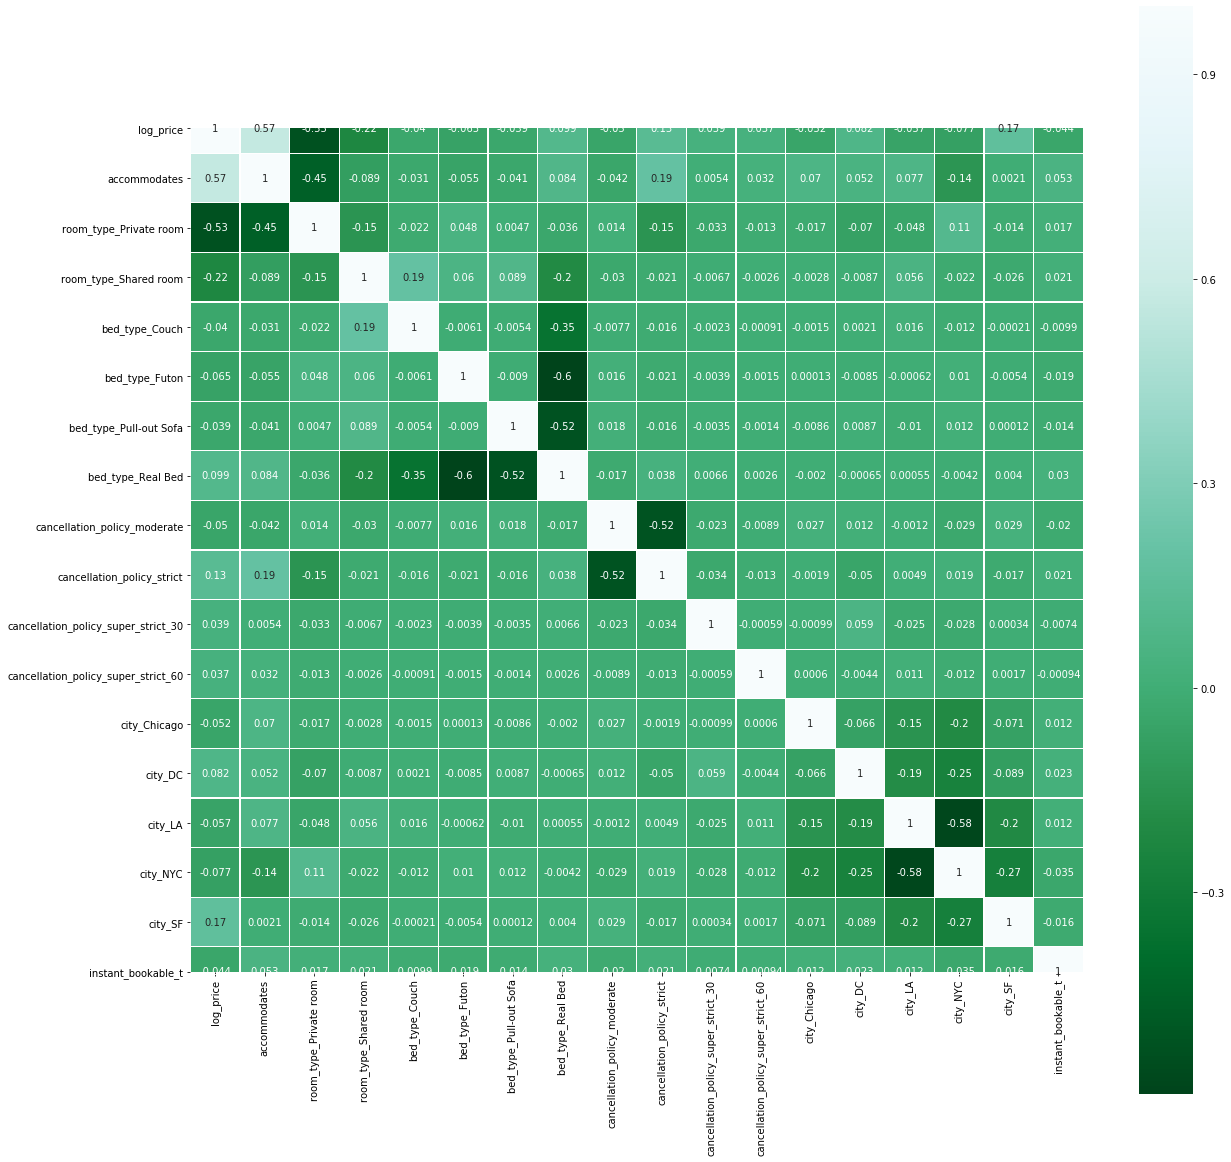

In [0]:
#Multicolinearity
checkCorrelation(numericdataX)

In [0]:
data_summary(numericdataX.drop(['log_price'],axis = 1))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     4652.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:19:43   Log-Likelihood:                -53631.
No. Observations:               74111   AIC:                         1.073e+05
Df Residuals:                   74093   BIC:                         1.075e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   4.7122      0.025    189.245      0.000       4.663       4.761
accommodates                            0.1268      0.001    127.763      0.000       0.125       0.129
room_type_Private room                 -0.5762      0.004   -133.420      0.000      -0.585      -0.568
room_type_Shared room                  -1.0229      0.012    -88.508      0.000      -1.046      -1.000
bed_type_Couch                          0.1592      0.038      4.156      0.000       0.084       0.234
bed_type_Futon                         -0.0229      0.029     -0.783      0.433      -0.080       0.034
bed_type_Pull-out Sofa                  0.0263      0.031      0.853      0.394      -0.034       0.087
bed_type_Real Bed                       0.0479      0.023      2.079      0.038       0.003       0.093
cancellation_policy_moderate           -0.0893      0.005    -18.061      0.000      -0.099      -0.080
cancellation_policy_strict             -0.0451      0.004    -10.128      0.000      -0.054      -0.036
cancellation_policy_super_strict_30     0.2908      0.047      6.128      0.000       0.198       0.384
cancellation_policy_super_strict_60     0.8926      0.121      7.367      0.000       0.655       1.130
city_Chicago                           -0.3080      0.012    -26.082      0.000      -0.331      -0.285
city_DC                                 0.0340      0.011      3.158      0.002       0.013       0.055
city_LA                                -0.1448      0.009    -15.855      0.000      -0.163      -0.127
city_NYC                               -0.0374      0.009     -4.179      0.000      -0.055      -0.020
city_SF                                 0.3136      0.011     29.769      0.000       0.293       0.334
instant_bookable_t                     -0.0819      0.004    -19.548      0.000      -0.090      -0.074
==============================================================================
Omnibus:                     9176.469   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25616.477
Skew:                           0.682   Prob(JB):                         0.00
Kurtosis:                       5.537   Cond. No.                         269.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
#creating dummy variable for column property_type
filedata.property_type.value_counts()

Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Cave                      2
Train                     2
Casa particular           1
Parking Space             1
Lighthouse                1
Island                    1
Name: property_type,

In [0]:
numericdataX=pd.concat([numericdataX,filedata['property_type']], axis=1)
numericdataX=pd.get_dummies(numericdataX,columns=['property_type'],drop_first=True)

In [0]:
numericdataX

,log_price,accommodates,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF,instant_bookable_t,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt
0,5.010635,3,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.129899,7,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.976734,5,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.620073,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.744932,2,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74107,5.043425,4,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74108,5.220356,5,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74109,5.273000,2,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data_summary(numericdataX)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.098e+31
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:21:19   Log-Likelihood:             2.3229e+06
No. Observations:               74111   AIC:                        -4.646e+06
Df Residuals:                   74058   BIC:                        -4.645e+06
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -2.707e-15    3.6e-16     -7.510      0.000   -3.41e-15      -2e-15
log_price                               1.0000   4.38e-17   2.28e+16      0.000       1.000       1.000
accommodates                         1.404e-16   1.33e-17     10.531      0.000    1.14e-16    1.66e-16
room_type_Private room               3.622e-16   5.93e-17      6.113      0.000    2.46e-16    4.78e-16
room_type_Shared room               -5.069e-16   1.46e-16     -3.462      0.001   -7.94e-16    -2.2e-16
bed_type_Couch                      -4.311e-16   4.55e-16     -0.948      0.343   -1.32e-15     4.6e-16
bed_type_Futon                       -1.28e-15   3.47e-16     -3.693      0.000   -1.96e-15   -6.01e-16
bed_type_Pull-out Sofa               -2.59e-15   3.65e-16     -7.091      0.000   -3.31e-15   -1.87e-15
bed_type_Real Bed                   -3.972e-16   2.74e-16     -1.451      0.147   -9.34e-16    1.39e-16
cancellation_policy_moderate          1.54e-16   5.87e-17      2.621      0.009    3.88e-17    2.69e-16
cancellation_policy_strict           2.636e-16   5.29e-17      4.985      0.000     1.6e-16    3.67e-16
cancellation_policy_super_strict_30  2.771e-16   5.62e-16      0.493      0.622   -8.25e-16    1.38e-15
cancellation_policy_super_strict_60  7.103e-16   1.44e-15      0.493      0.622   -2.12e-15    3.54e-15
city_Chicago                        -9.263e-17   1.41e-16     -0.659      0.510   -3.68e-16    1.83e-16
city_DC                              7.969e-17   1.28e-16      0.621      0.535   -1.72e-16    3.31e-16
city_LA                              6.188e-16    1.1e-16      5.629      0.000    4.03e-16    8.34e-16
city_NYC                            -6.418e-17   1.07e-16     -0.601      0.548   -2.74e-16    1.45e-16
city_SF                             -2.571e-16   1.26e-16     -2.039      0.041   -5.04e-16   -9.98e-18
instant_bookable_t                  -4.987e-18   4.98e-17     -0.100      0.920   -1.03e-16    9.27e-17
property_type_Bed & Breakfast        1.442e-15   2.78e-16      5.184      0.000    8.97e-16    1.99e-15
property_type_Boat                   1.693e-15   7.35e-16      2.305      0.021    2.53e-16    3.13e-15
property_type_Boutique hotel         1.336e-17   7.14e-16      0.019      0.985   -1.39e-15    1.41e-15
property_type_Bungalow              -6.279e-16   3.13e-16     -2.008      0.045   -1.24e-15   -1.49e-17
property_type_Cabin                  1.799e-16   6.98e-16      0.258      0.797   -1.19e-15    1.55e-15
property_type_Camper/RV              1.652e-15   6.12e-16      2.700      0.007    4.53e-16    2.85e-15
property_type_Casa particular        2.942e-15   5.91e-15      0.498      0.619   -8.65e-15    1.45e-14
property_type_Castle                 -2.03e-17   1.64e-15     -0.01

In [0]:
crossValidationError(numericdataX)

0.49598872488071793

In [0]:
# P value of bed type has poor P value
numericdataX = numericdataX.loc[:, ~numericdataX.columns.str.startswith('bed_type_')]

In [0]:
data_summary(numericdataX.drop(['log_price'],axis=1))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     1726.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:22:26   Log-Likelihood:                -53133.
No. Observations:               74111   AIC:                         1.064e+05
Df Residuals:                   74063   BIC:                         1.068e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   4.7445      0.010    475.621      0.000       4.725       4.764
accommodates                            0.1243      0.001    121.946      0.000       0.122       0.126
room_type_Private room                 -0.5875      0.004   -131.442      0.000      -0.596      -0.579
room_type_Shared room                  -1.0003      0.011    -87.976      0.000      -1.023      -0.978
cancellation_policy_moderate           -0.0884      0.005    -17.987      0.000      -0.098      -0.079
cancellation_policy_strict             -0.0457      0.004    -10.315      0.000      -0.054      -0.037
cancellation_policy_super_strict_30     0.3041      0.047      6.451      0.000       0.212       0.397
cancellation_policy_super_strict_60     0.7985      0.121      6.606      0.000       0.562       1.035
city_Chicago                           -0.3099      0.012    -26.399      0.000      -0.333      -0.287
city_DC                                 0.0358      0.011      3.328      0.001       0.015       0.057
city_LA                                -0.1384      0.009    -15.045      0.000      -0.156      -0.120
city_NYC                               -0.0217      0.009     -2.420      0.016      -0.039      -0.004
city_SF                                 0.3144      0.011     29.921      0.000       0.294       0.335
instant_bookable_t                     -0.0808      0.004    -19.411      0.000      -0.089      -0.073
property_type_Bed & Breakfast           0.1714      0.023      7.348      0.000       0.126       0.217
property_type_Boat                      0.2641      0.062      4.289      0.000       0.143       0.385
property_type_Boutique hotel            0.3368      0.060      5.628      0.000       0.219       0.454
property_type_Bungalow                 -0.0513      0.026     -1.957      0.050      -0.103    7.56e-05
property_type_Cabin                    -0.1069      0.059     -1.826      0.068      -0.222       0.008
property_type_Camper/RV                -0.2250      0.051     -4.387      0.000      -0.325      -0.124
property_type_Casa particular           0.3199      0.496      0.645      0.519      -0.652       1.292
property_type_Castle                    0.3739      0.138      2.718      0.007       0.104       0.644
property_type_Cave                      0.2725      0.351      0.777      0.437      -0.415       0.960
property_type_Chalet                    0.0727      0.202      0.359      0.719      -0.324       0.469
property_type_Condominium               0.1784      0.010     17.749      0.000       0.159       0.198
property_type_Dorm                     -0.4610      0.042    -10.951      0.000      -0.543      -0.378
property_type_Earth House               0.3026      0.248      1.22

In [0]:
crossValidationError(numericdataX)

0.4960731325731075

In [0]:
#Interaction Term
filedata.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [0]:
interactionDF= pd.DataFrame()

In [0]:
interactionDF['bedrooms']=filedata['bedrooms']
interactionDF['beds']=filedata['beds']
interactionDF['bathrooms']=filedata['bathrooms']

In [0]:
interactionDF['bed*bathroom*bedrooms']=filedata['bedrooms']*filedata['beds']*filedata['bathrooms']

In [0]:
data_summary(interactionDF)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     6273.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:24:34   Log-Likelihood:                -69737.
No. Observations:               74111   AIC:                         1.395e+05
Df Residuals:                   74106   BIC:                         1.395e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.1058      0.007    631.154      0.000       4.093       4.119
bedrooms                  0.2497      0.004     60.615      0.000       0.242       0.258
beds                      0.1252      0.003     45.403      0.000       0.120       0.131
bathrooms                 0.1287      0.005     24.845      0.000       0.119       0.139
bed*bathroom*bedrooms    -0.0022      0.000    -15.032      0.000      -0.002      -0.002
==============================================================================
Omnibus:                     2340.676   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5478.523
Skew:                           0.162   Prob(JB):                         0.00
Kurtosis:                       4.292   Cond. No.                         77.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
numericdataX= pd.concat([numericdataX,interactionDF],axis=1)
data_summary(numericdataX)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.571e+30
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:25:17   Log-Likelihood:             2.2572e+06
No. Observations:               74111   AIC:                        -4.514e+06
Df Residuals:                   74058   BIC:                        -4.514e+06
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -1.903e-15   5.92e-16     -3.212      0.001   -3.06e-15   -7.42e-16
log_price                               1.0000    1.1e-16    9.1e+15      0.000       1.000       1.000
accommodates                        -3.889e-15   4.94e-17    -78.696      0.000   -3.99e-15   -3.79e-15
room_type_Private room              -8.353e-15   1.47e-16    -56.845      0.000   -8.64e-15   -8.06e-15
room_type_Shared room               -1.344e-14    3.5e-16    -38.339      0.000   -1.41e-14   -1.28e-14
cancellation_policy_moderate        -6.546e-15   1.42e-16    -45.954      0.000   -6.82e-15   -6.27e-15
cancellation_policy_strict           3.237e-15   1.28e-16     25.244      0.000    2.99e-15    3.49e-15
cancellation_policy_super_strict_30  2.096e-15   1.36e-15      1.537      0.124   -5.76e-16    4.77e-15
cancellation_policy_super_strict_60 -8.323e-15    3.5e-15     -2.381      0.017   -1.52e-14   -1.47e-15
city_Chicago                         1.869e-14   3.41e-16     54.802      0.000     1.8e-14    1.94e-14
city_DC                               1.11e-14   3.12e-16     35.642      0.000    1.05e-14    1.17e-14
city_LA                               8.35e-15   2.67e-16     31.309      0.000    7.83e-15    8.87e-15
city_NYC                              7.64e-15   2.59e-16     29.505      0.000    7.13e-15    8.15e-15
city_SF                              1.081e-15   3.06e-16      3.536      0.000    4.82e-16    1.68e-15
instant_bookable_t                  -7.683e-16   1.21e-16     -6.351      0.000   -1.01e-15   -5.31e-16
property_type_Bed & Breakfast        -4.77e-15   6.75e-16     -7.071      0.000   -6.09e-15   -3.45e-15
property_type_Boat                   1.374e-15   1.78e-15      0.771      0.440   -2.12e-15    4.86e-15
property_type_Boutique hotel        -1.755e-15   1.73e-15     -1.014      0.311   -5.15e-15    1.64e-15
property_type_Bungalow                2.22e-16   7.58e-16      0.293      0.770   -1.26e-15    1.71e-15
property_type_Cabin                  1.624e-15   1.69e-15      0.959      0.337   -1.69e-15    4.94e-15
property_type_Camper/RV               6.73e-15   1.48e-15      4.537      0.000    3.82e-15    9.64e-15
property_type_Casa particular       -9.811e-15   1.43e-14     -0.684      0.494   -3.79e-14    1.83e-14
property_type_Castle                -3.001e-15   3.98e-15     -0.754      0.451   -1.08e-14    4.79e-15
property_type_Cave                   5.726e-16   1.01e-14      0.056      0.955   -1.93e-14    2.04e-14
property_type_Chalet                 -5.09e-16   5.85e-15     -0.087      0.931    -1.2e-14     1.1e-14
property_type_Condominium           -2.255e-16   2.91e-16     -0.773      0.439   -7.97e-16    3.46e-16
property_type_Dorm                   2.773e-15   1.23e-15      2.25

In [0]:
interactionDF1= pd.DataFrame()

In [0]:
interactionDF1['review_scores_rating']=filedata['review_scores_rating']
interactionDF1['number_of_reviews']=filedata['number_of_reviews']

In [0]:
interactionDF1['reiew_score*Number']=filedata['review_scores_rating']*filedata['number_of_reviews']

In [0]:
interactionDF1['reiew_score*Number']=filedata['review_scores_rating']*filedata['number_of_reviews']

In [0]:
numericdataX= pd.concat([numericdataX,interactionDF1],axis=1)

In [0]:
data_summary(numericdataX)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.582e+26
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:26:41   Log-Likelihood:             1.9273e+06
No. Observations:               74111   AIC:                        -3.854e+06
Df Residuals:                   74055   BIC:                        -3.854e+06
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -1.092e-12   5.29e-14    -20.636      0.000    -1.2e-12   -9.88e-13
log_price                               1.0000   9.58e-15   1.04e+14      0.000       1.000       1.000
accommodates                        -9.928e-15   4.25e-15     -2.333      0.020   -1.83e-14   -1.59e-15
room_type_Private room               6.576e-15   1.27e-14      0.519      0.604   -1.83e-14    3.14e-14
room_type_Shared room                3.026e-13   3.02e-14     10.019      0.000    2.43e-13    3.62e-13
cancellation_policy_moderate         1.267e-13   1.27e-14      9.970      0.000    1.02e-13    1.52e-13
cancellation_policy_strict           3.454e-14   1.15e-14      2.990      0.003    1.19e-14    5.72e-14
cancellation_policy_super_strict_30  1.815e-12   1.17e-13     15.506      0.000    1.59e-12    2.04e-12
cancellation_policy_super_strict_60  9.564e-12      3e-13     31.869      0.000    8.98e-12    1.02e-11
city_Chicago                        -2.276e-13   2.93e-14     -7.769      0.000   -2.85e-13    -1.7e-13
city_DC                             -3.665e-13   2.68e-14    -13.700      0.000   -4.19e-13   -3.14e-13
city_LA                             -3.613e-13   2.29e-14    -15.771      0.000   -4.06e-13   -3.16e-13
city_NYC                            -1.236e-13   2.22e-14     -5.557      0.000   -1.67e-13      -8e-14
city_SF                             -3.708e-13   2.63e-14    -14.124      0.000   -4.22e-13   -3.19e-13
instant_bookable_t                  -1.416e-13   1.04e-14    -13.577      0.000   -1.62e-13   -1.21e-13
property_type_Bed & Breakfast       -5.762e-13   5.79e-14     -9.944      0.000    -6.9e-13   -4.63e-13
property_type_Boat                   1.353e-14   1.53e-13      0.089      0.929   -2.86e-13    3.13e-13
property_type_Boutique hotel         9.286e-14   1.49e-13      0.625      0.532   -1.98e-13    3.84e-13
property_type_Bungalow               -7.65e-13   6.51e-14    -11.753      0.000   -8.93e-13   -6.37e-13
property_type_Cabin                 -8.228e-13   1.46e-13     -5.654      0.000   -1.11e-12   -5.38e-13
property_type_Camper/RV              1.808e-12   1.27e-13     14.201      0.000    1.56e-12    2.06e-12
property_type_Casa particular        1.867e-13   1.23e-12      0.152      0.879   -2.22e-12     2.6e-12
property_type_Castle                 7.394e-12   3.41e-13     21.659      0.000    6.72e-12    8.06e-12
property_type_Cave                   1.046e-12    8.7e-13      1.203      0.229   -6.59e-13    2.75e-12
property_type_Chalet                -1.734e-13   5.03e-13     -0.345      0.730   -1.16e-12    8.12e-13
property_type_Condominium           -2.028e-14    2.5e-14     -0.810      0.418   -6.93e-14    2.88e-14
property_type_Dorm                   5.427e-13   1.05e-13      5.15

In [0]:
crossValidationError(numericdataX)

0.4721355501041085

In [0]:
#New Way
numericdataX

,log_price,accommodates,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF,instant_bookable_t,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,bedrooms,beds,bathrooms,bed*bathroom*bedrooms,review_scores_rating,number_of_reviews,reiew_score*Number
0,5.010635,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,100.0,2,200.0
1,5.129899,7,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,3.0,1.0,9.0,93.0,6,558.0
2,4.976734,5,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,3.0,1.0,3.0,92.0,10,920.0
3,6.620073,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,1.0,4.0,0.0,0,0.0
4,4.744932,2,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0,40.0,4,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,0.0,0,0.0
74107,5.043425,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,4.0,2.0,16.0,93.0,16,1488.0
74108,5.220356,5,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,1.0,4.0,94.0,43,4042.0
74109,5.273000,2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2.0,1.0,0.0,0.0,0,0.0


In [0]:
#Classification with Logistic Regression
#Classification with Trees
#a> Bagging based tree algorithm (Random Forest)
#b> Boosting based tree algorithm(Gradient Boosting)

In [0]:
#Classification with Logistic Regression
filedata

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,0,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,0,t,t,0,2015-04-19,f,0,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,0.0,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,0,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,NYC,one room in bushwick apt,0,t,t,0,2013-03-24,f,0,40.709025,-73.939405,one room bushwick,Williamsburg,0,0.0,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,LA,"Located on the Pacific Coast Highway, this apa...",2016-08-15,t,f,100%,2016-05-03,f,2017-04-15,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,NYC,A modern apartment located in East Williamsbur...,2015-01-03,t,t,100%,2012-01-05,t,2017-09-10,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,NYC,"Fully renovated, designer's studio located in ...",0,t,f,100%,2017-09-17,t,0,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,0.0,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [0]:
#Taking the mean of log price
mean_log= np.mean(numericdataX['log_price'])

In [0]:
classificationData = numericdataX

In [0]:
classificationData.loc[classificationData['log_price'] <= mean_log, 'log_price'] = 0

In [0]:
classificationData.loc[ classificationData['log_price'] > mean_log, 'log_price'] = 1

In [0]:
classificationDataY= classificationData['log_price']
classificationDataX=classificationData.drop(['log_price'], axis = 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(classificationDataX, classificationDataY, test_size = 0.25,random_state = 4)

In [0]:
classifier = LogisticRegression()

In [0]:
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [0]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7752 1939]
 [1620 7217]]


In [0]:
#7752 + 7217 correct predictions and 1939 + 1620  incorrect predictions.

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81      9691
         1.0       0.79      0.82      0.80      8837

    accuracy                           0.81     18528
   macro avg       0.81      0.81      0.81     18528
weighted avg       0.81      0.81      0.81     18528



In [0]:
def rocAucCurve(classifier):
    logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='For Classification (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

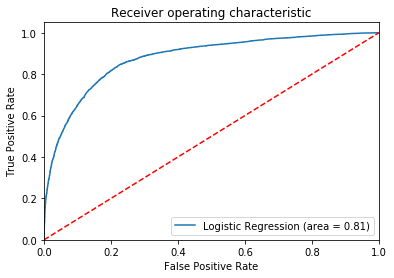

In [0]:
rocAucCurve(classifier)

In [0]:
#Classification with trees
classifierDT = RandomForestClassifier()  
classifierDT.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = classifierDT.predict(X_test) 

In [0]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[7889 1802]
 [2201 6636]]
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.80      9691
         1.0       0.79      0.75      0.77      8837

    accuracy                           0.78     18528
   macro avg       0.78      0.78      0.78     18528
weighted avg       0.78      0.78      0.78     18528



In [0]:
print('Accuracy of Random Forest_1 on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of Random Forest_1 on test set: 0.81


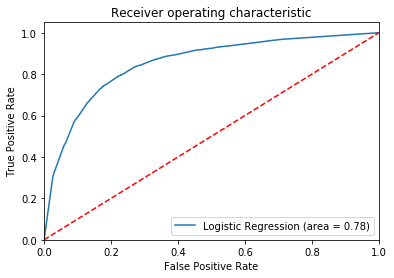

In [0]:
rocAucCurve(classifierDT)

In [0]:
##Let us see what default parameters our model used
print('Parameters currently in use:\n')
pprint(classifierDT.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [0]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]
}

In [0]:
rf = RandomForestClassifier()

In [0]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [0]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  3.2min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [0]:
random1 = RandomForestClassifier(n_estimators = 200,max_depth = 90, 
                                 min_samples_split = 8, min_samples_leaf = 3, 
                                 max_features = 3,bootstrap = True)

In [0]:
random1.fit(X_train,y_train)
y_pred = random1.predict(X_test)

In [0]:
print(confusion_matrix(y_test, y_pred)) 

[[7932 1759]
 [1854 6983]]


              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81      9691
         1.0       0.80      0.79      0.79      8837

    accuracy                           0.80     18528
   macro avg       0.80      0.80      0.80     18528
weighted avg       0.80      0.80      0.80     18528



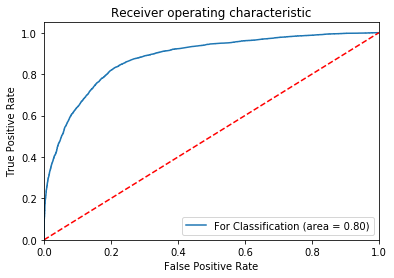

In [0]:
print(classification_report(y_test, y_pred)) 
rocAucCurve(random1)

In [0]:
#Boosting based tree algorithm
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
y_pred = gb.predict(X_test)  
print(confusion_matrix(y_test, y_pred))

[[7813 1878]
 [1564 7273]]


              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      9691
         1.0       0.79      0.82      0.81      8837

    accuracy                           0.81     18528
   macro avg       0.81      0.81      0.81     18528
weighted avg       0.81      0.81      0.81     18528



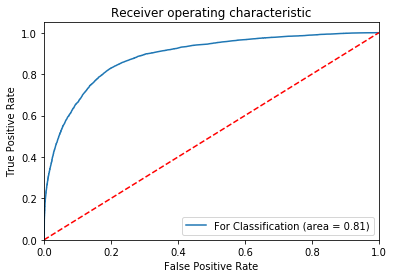

In [0]:
print(classification_report(y_test, y_pred)) 
rocAucCurve(gb)

In [0]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

In [0]:
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, 
                                    max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.722
Accuracy score (validation): 0.715

Learning rate:  0.1
Accuracy score (training): 0.731
Accuracy score (validation): 0.726

Learning rate:  0.25
Accuracy score (training): 0.742
Accuracy score (validation): 0.736

Learning rate:  0.5
Accuracy score (training): 0.755
Accuracy score (validation): 0.750

Learning rate:  0.75
Accuracy score (training): 0.765
Accuracy score (validation): 0.762

Learning rate:  1
Accuracy score (training): 0.773
Accuracy score (validation): 0.769



In [0]:
#Using learning rate = 1
gb_op = GradientBoostingClassifier(n_estimators=20, learning_rate = 1.0, 
                                   max_features=2, max_depth = 2, random_state = 0)
gb_op.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
y_pred = gb_op.predict(X_test)  
print(confusion_matrix(y_test, y_pred))

[[7795 1896]
 [2384 6453]]


              precision    recall  f1-score   support

         0.0       0.77      0.80      0.78      9691
         1.0       0.77      0.73      0.75      8837

    accuracy                           0.77     18528
   macro avg       0.77      0.77      0.77     18528
weighted avg       0.77      0.77      0.77     18528



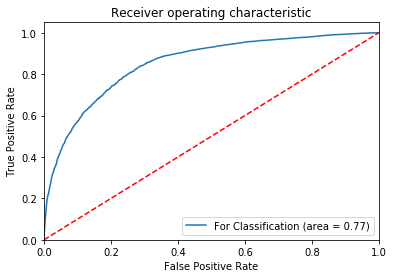

In [0]:
print(classification_report(y_test, y_pred)) 
rocAucCurve(gb_op)

In [0]:
#Linear Regression with Trees
Y= filedata['log_price']

In [0]:
numericdataX= numericdataX.drop(['log_price'],axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(numericdataX, Y, test_size = 0.2, random_state = 0) 

In [0]:
regressor = RandomForestRegressor()  
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df

,Actual,Predicted
1659,4.605170,5.590776
69860,5.010635,5.103511
53175,4.077537,4.538578
1390,5.686975,4.824331
59598,5.991465,5.019303
...,...,...
52736,4.905275,4.785499
57562,5.298317,4.526541
26112,5.099866,4.955266
71229,4.605170,4.157559


In [0]:
def regression_Metrics(y_test, y_pred):  
    from sklearn import metrics  
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [0]:
regression_Metrics(y_test,y_pred)

Mean Absolute Error: 0.36841920883309953
Mean Squared Error: 0.23950910788690105
Root Mean Squared Error: 0.4893966774375374


In [0]:
#Let us see what default parameters our model used
print('Parameters currently in use:\n')
pprint(regressor.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [0]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]
}

In [0]:
rf = RandomForestRegressor()

In [0]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [0]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  3.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [0]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [0]:
regressor1=RandomForestRegressor(n_estimators = 100,max_depth = 80, min_samples_split = 3, 
                                 min_samples_leaf=8, max_features=3,bootstrap=True)

In [0]:
regressor1.fit(X_train,y_train)
y_pred = regressor1.predict(X_test) f

In [0]:
regression_Metrics(y_test,y_pred)

Mean Absolute Error: 0.38931445809815396
Mean Squared Error: 0.2609260451214904
Root Mean Squared Error: 0.5108092061831799


In [0]:
#Boosting based tree algorithm (GradientBoosting)
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred = gb.predict(X_test)

In [0]:
regression_Metrics(y_test,y_pred)

Mean Absolute Error: 0.3443284803916308
Mean Squared Error: 0.2077512273641171
Root Mean Squared Error: 0.4557973533974469


In [0]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

In [0]:
for learning_rate in learning_rates:
    gb = GradientBoostingRegressor(n_estimators=20, learning_rate = learning_rate, max_features=2, 
                                   max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.181
Accuracy score (validation): 0.182

Learning rate:  0.1
Accuracy score (training): 0.280
Accuracy score (validation): 0.284

Learning rate:  0.25
Accuracy score (training): 0.409
Accuracy score (validation): 0.415

Learning rate:  0.5
Accuracy score (training): 0.464
Accuracy score (validation): 0.465

Learning rate:  0.75
Accuracy score (training): 0.470
Accuracy score (validation): 0.471

Learning rate:  1
Accuracy score (training): 0.479
Accuracy score (validation): 0.485



In [0]:
gb_op = GradientBoostingRegressor(n_estimators=20, learning_rate = 1, 
                                  max_features=2, max_depth = 2, random_state = 42)
gb_op.fit(X_train,y_train)
y_pred = gb_op.predict(X_test)